In [2]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-dark')


In [3]:
#Importing the data from the url

url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)
print("Data imported successfully")



Data imported successfully


In [4]:
# Checking out the head values

dataset.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# checking out the highest and lowest scores of student in this class

print("Max Score : ",dataset['Scores'].max())
print("Min Score : ",dataset['Scores'].min())

Max Score :  95
Min Score :  17


In [6]:
# checking out the maxium time, minimum time and average time the student study

print("Max Time : ",dataset['Hours'].max(), "hours")
print("Min Time : ",dataset['Hours'].min(), "hours")
print("Average Time : ",dataset['Hours'].mean(), "hours")

Max Time :  9.2 hours
Min Time :  1.1 hours
Average Time :  5.012 hours


In [7]:
#checking out the dataset has null values or not

dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
#Finding out how many students study for how many hours
#So we make a different dataset

labels = ["Less than 1 hour","1-2 hours","2-3 hours","3-4 hours","4-5 hours","5-6 hours","6-7 hours","7 and more hours"]
bins= [0,1,2,3,4,5,6,7,8]
freq_df = dataset.groupby(pd.cut(dataset['Hours'],bins=bins,labels=labels)).size()



In [9]:
freq_df = freq_df.reset_index(name="Number of students")
freq_df

,Hours,Number of students
0,Less than 1 hour,0
1,1-2 hours,3
2,2-3 hours,4
3,3-4 hours,4
4,4-5 hours,2
5,5-6 hours,3
6,6-7 hours,2
7,7 and more hours,3


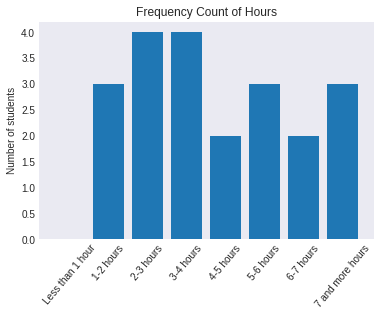

In [10]:
# Plot of Freq Table
plt.bar(freq_df['Hours'],freq_df['Number of students'])
plt.xticks(rotation=50)
plt.ylabel('Number of students')
plt.title('Frequency Count of Hours')
plt.show()

<AxesSubplot:xlabel='Hours', ylabel='Number of students'>

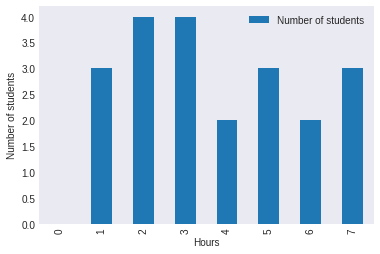

In [11]:
# Bar representation of students of studying 

freq_df.plot(kind='bar', xlabel="Hours",ylabel="Number of students")


## In the above graph we can see the most student study for 2-3 hours

<AxesSubplot:xlabel='Hours', ylabel='Number of students'>

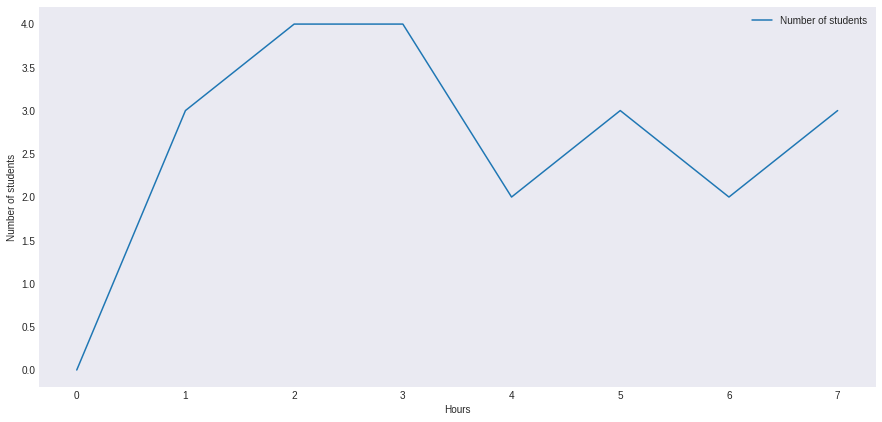

In [12]:
# Line representation of students of studying 
freq_df.plot(kind='line', xlabel="Hours",ylabel="Number of students", figsize=(15,7))


## Narative

1. Most students study for 2 to  3 hours
2. Some students study for less than 1 hour

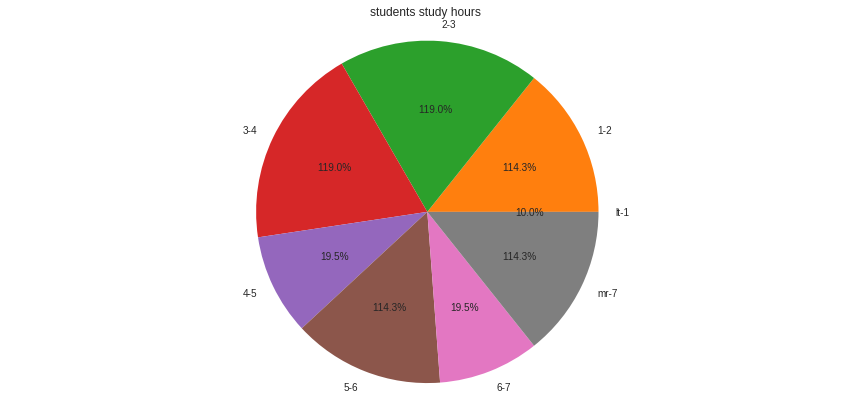

In [13]:
# Pie chart
labels = ['lt-1',"1-2","2-3","3-4","4-5","5-6","6-7","mr-7"]
fig1,ax1 = plt.subplots(figsize=(15,7))
ax1.pie(freq_df['Number of students'],labels=labels,autopct='1%.1f%%')
ax1.axis('equal')
plt.title("students study hours")
plt.show()


### Now, we can do lot of things like scaling, or exploring but due to the limited data we are directly going to the model bulding

In [14]:
x = dataset.drop(['Scores'],axis=1)
y=dataset['Scores']

# Spliting the Data

In [15]:
# spliting the data
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)


In [16]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [26]:
from sklearn import metrics 
print('Linear Regression Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2_Score: ', metrics.r2_score(y_test, y_pred))


Linear Regression Performance:

all features, No scaling:
MAE: 4.183859899002982
RMSE: 4.647447612100373
R2_Score:  0.9454906892105354


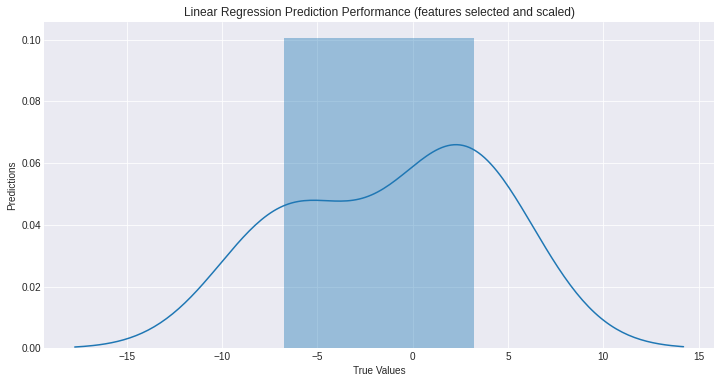

In [28]:

fig = plt.figure(figsize=(12, 6))
sns.distplot(y_test - y_pred)
plt.xlabel('True Values') 
plt.ylabel('Predictions') 
plt.title('Linear Regression Prediction Performance (features selected and scaled)') 
plt.grid()
plt.show()


## Conclusion

### In this project, we made the linear Regression model, and predict the values from it, after predicting the values we measured by Mean Squared Error(MAE), Root Mean Squared Error(RMSE) and R2_Score, and calculations are: 

#### MAE: 4.183859899002982
#### RMSE: 4.647447612100373
#### R2_Score:  0.9454906892105354